## Regression part a


### 1:

Explain what variable is predicted based on which other variables and what
you hope to accomplish by the regression. Mention your feature transformation
choices such as one-of-K coding. Since we will use regularization momentarily,
apply a feature transformation to your data matrix X such that each column
has mean 0 and standard deviation 1.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
%store -r data

In [27]:
data

,MPAA_Rating,genre,title,Budget,Gross,release_date,runtime,rating,rating_count
0,1,3,129,7500000.0,145793296.0,32855.0,99.0,7.4,91075.0
1,1,4,583,13000000.0,71079915.0,32717.0,100.0,7.2,91415.0
2,3,15,63,14000000.0,161001698.0,32862.0,145.0,7.2,91415.0
3,1,5,155,15000000.0,84431625.0,32619.0,107.0,7.5,101702.0
4,1,6,586,15000000.0,79258538.0,32736.0,100.0,7.0,77659.0
...,...,...,...,...,...,...,...,...,...
629,2,0,318,250000000.0,765199095.0,44477.0,163.0,7.3,323556.0
630,2,10,624,55000000.0,106457.0,44512.0,115.0,7.5,82101.0
631,2,0,594,110000000.0,212500000.0,44470.0,157.0,6.0,180165.0
632,2,3,338,17000000.0,115400000.0,41187.0,112.0,4.4,276.0


In [29]:
# Eseguire la codifica one-hot della colonna 'mpaa'
df_encoded = pd.get_dummies(data, columns=["MPAA_Rating"], prefix="mpaa")
df_encoded = pd.get_dummies(df_encoded, columns=["genre"], prefix="genre")
# Visualizzare il DataFrame codificato
print(df_encoded)

     title       Budget        Gross  release_date  runtime  rating  \
0      129    7500000.0  145793296.0       32855.0     99.0     7.4   
1      583   13000000.0   71079915.0       32717.0    100.0     7.2   
2       63   14000000.0  161001698.0       32862.0    145.0     7.2   
3      155   15000000.0   84431625.0       32619.0    107.0     7.5   
4      586   15000000.0   79258538.0       32736.0    100.0     7.0   
..     ...          ...          ...           ...      ...     ...   
629    318  250000000.0  765199095.0       44477.0    163.0     7.3   
630    624   55000000.0     106457.0       44512.0    115.0     7.5   
631    594  110000000.0  212500000.0       44470.0    157.0     6.0   
632    338   17000000.0  115400000.0       41187.0    112.0     4.4   
633    378   20000000.0   57200000.0       38793.0    105.0     4.5   

     rating_count  mpaa_0  mpaa_1  mpaa_2  ...  genre_7  genre_8  genre_9  \
0         91075.0   False    True   False  ...    False    False    Fa

1. Split your data into features (independent variables) and the target variable (Gross)


In [31]:
X = df_encoded.drop("Gross", axis=1)  # Features (indipendent variables)
X = X.drop(columns="title")
y = df_encoded["Gross"]  # Target variable (dipendent variable)
# X["bias"] = 1

In [32]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your feature matrix and transform it
X_scaled = scaler.fit_transform(X)

2. Define a range of values for the regularization parameter λ (alpha) that you want to test.

These values were decided by trying different combinations of them and how the plots were


In [33]:
lambdas = np.arange(0, 500, 10, dtype="float")

3. Perform 10-fold cross-validation with Ridge regression for each value of λ


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [34]:
errors = []

best_error = 1
best_lambda = None

for lambda_i in lambdas:
    model = Ridge(alpha=lambda_i)
    # 10 fold cross validation
    scores = cross_val_predict(model, X_scaled, y, cv=10)
    mean_score = scores.mean()
    # generalization error for lambda_i
    gen_err = 1 - mean_score
    results[lambda_i] = gen_err
    errors.append(gen_err)

    if gen_err < best_error:
        best_error = gen_err  # update the lowest generalization error

        best_lambda = lambda_i  # update the best lambda
for lambda_i in lambdas:
    model = Ridge(alpha=lambda_i)
    # 10 fold cross validation
    scores = cross_val_predict(model, X_scaled, y, cv=10)
    # print(scores)
    # mean_score = scores.mean()
    # generalization error for lambda_i
    # gen_err = 1 - mean_score
    # errors.append(gen_err)
    # if gen_err < best_error:
    #     best_error = gen_err  # update the lowest generalization error

    #     best_lambda = lambda_i  # update the best lambda
    # Calcola il numero di osservazioni misclassificate
    y_pred = cross_val_predict(model, X_scaled, y, cv=10)  # Previsioni del modello
    r_2 = r2_score(y, y_pred)

    # number of misclassified observations
    errors.append(r_2)
    print(r_2)
    # if gen_err_lambda_i < best_error_lambda_i:
    #     best_error_lambda_i = gen_err_lambda_i  # update the lowest generalization error for the current outer fold
    #     best_lambda_i = lambda_i  # update the best lambda for the current outer fold


print(f"best error = {best_error}, best lambda = {best_lambda}")

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8887e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.29178e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.22545e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Dell\AppData\L

-1.0837257659322276e+25
0.5403960112787191
0.5417054688412983
0.5426664802334955
0.5433414890919347
0.5437785511028883
0.5440152610530906
0.5440814672927778
0.544001186661202
0.5437939802378277
0.5434759581236153
0.5430605243271456
0.5425589365641528
0.5419807322608992
0.5413340565036557
0.5406259172153873
0.5398623856882356
0.5390487556372496
0.5381896704495301
0.5372892258157501
0.5363510531380857
0.5353783878018845
0.5343741254361507
0.5333408685724934
0.5322809655753732
0.5311965433102478
0.530089534706284
0.5289617021320413
0.52781465731802
0.5266498784160947
0.5254687246729424
0.5242724491053946
0.5230622094947925
0.521839077960824
0.5206040493298443
0.5193580484759672
0.5181019367834152
0.5168365178543293
0.5155625425663319
0.5142807135677803
0.512991689285111
0.5116960875054746
0.5103944885885128
0.5090874383533246
0.50777545068013
0.5064590098606193
0.5051385727263307
0.5038145705804519
0.5024874109550919
0.5011574792132156
best error = 1, best lambda = None


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=0
)

In [50]:
from sklearn import svm

clf = Ridge(alpha=best_lambda).fit(X_scaled, y)
clf

Ridge(alpha=160.0)

In [51]:
clf.score(X_test, y_test)

0.5370952027842397

In [41]:
scores

array([-2.69578907, -1.68882562, -0.19355839, -0.25002882,  0.18360376,
        0.18464327,  0.06213476, -0.20775611, -0.54235585,  0.04021668])

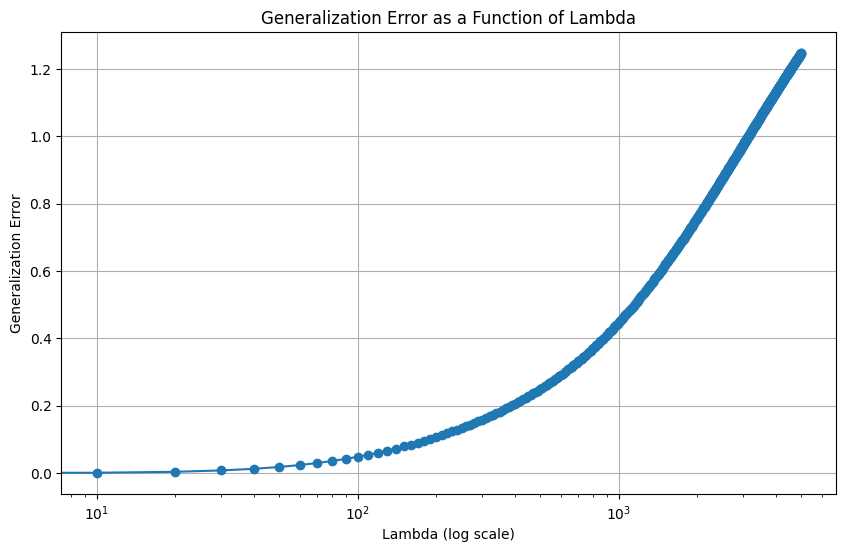

In [34]:
# Create a plot of generalization error as a function of λ
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, errors, marker="o", linestyle="-")
plt.title("Generalization Error as a Function of Lambda")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Generalization Error")
plt.grid(True)
plt.show()

4. Find the λ that gives the lowest generalization error


Values of coefficients are the weigths for each feature and intercept is the bias term
$$y=(biasterm) + weigths*(features)$$


In [9]:
# Create and train a Ridge regression model
model = Ridge(alpha=best_lambda)  # Use the best_alpha value you've determined
model.fit(X_scaled, y)  # X is your feature matrix, y is your target variable

# Access the coefficients
coefficients = model.coef_  # Coefficients (weights)
intercept = model.intercept_  # Intercept (bias term)

In [10]:
coefficients

array([-2.68033647e+07, -1.42442736e+07,  1.30938971e+08,  5.31093829e+07,
        3.46004724e+07,  1.16913960e+07,  7.33797296e+07])

In [11]:
intercept

435227473.55111825

This is the plot as 14.2 in the book


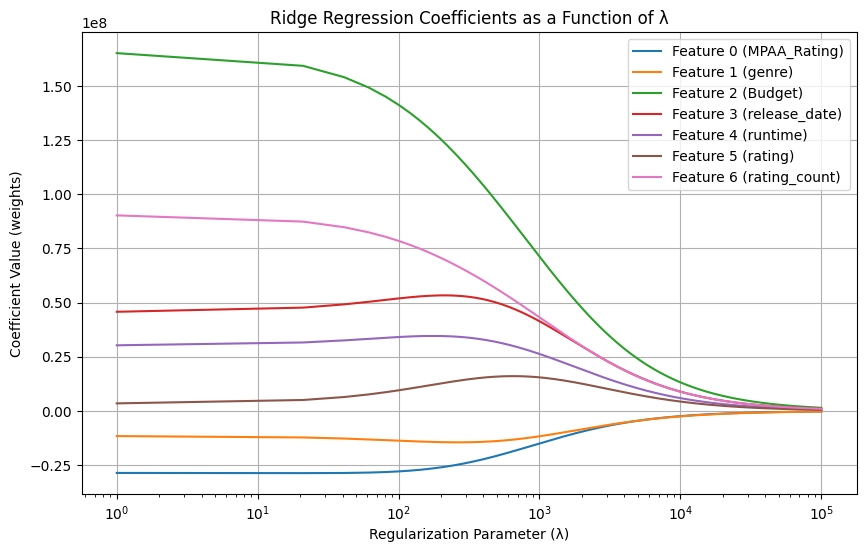

In [12]:
coefficients = []
lambdas1 = np.arange(1, 100000, 20, dtype=float)

for alpha in lambdas1:
    # Create and fit a Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_scaled, y)  # Use your transformed data

    # Get the coefficients for this λ
    coef = model.coef_
    coefficients.append(coef)

# Convert coefficients to a NumPy array
coefficients = np.array(coefficients)

# Create a plot to visualize the coefficients
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.semilogx(lambdas1, coefficients[:, i], label=f"Feature {i} ({X.columns[i]})")
plt.title("Ridge Regression Coefficients as a Function of λ")
plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Coefficient Value (weights)")
plt.legend()
plt.grid()
plt.show()

## Regression part b


In this section, we will compare three models: the regularized
linear regression model from the previous section, an artificial neural network (ANN) and a baseline.

We are interested in two questions:

- Is one model better than the other?
- Is either model better than a trivial baseline?.

We will attempt to answer
these questions with two-level cross-validation.


### 1 Implement two-level cross-validation

(see algorithm 6 of the lecture notes). We will use 2-level cross-validation to compare the models with K1 = K2 = 10 folds.

As a baseline model, we will apply a linear regression model with no features, i.e. it computes the mean of y on the training data, and use this value to predict y on the test data.

Make sure you can fit an ANN model to the data.

As complexity-controlling parameter for the ANN, we will use the number of hidden units5 h.
Based on a few test-runs, select a reasonable range of values for h (which should include h = 1), and describe the range of values you will use for h and λ.


The baseline model is a simple linear regression model that computes the mean of the target variable (y) on the training data and uses this mean value to predict y on the test data.


In [13]:
import torch
import toolbox_functions
from sklearn import model_selection

In [14]:
# Parameters for Neural Network
n_hidden_units = 1
n_replicates = 1  # number of networks trained in each k-fold
max_iter = 10000
N, M = X.shape


def model():
    return torch.nn.Sequential(
        torch.nn.Linear(M, n_hidden_units),  # M features to n_hidden_units
        torch.nn.Tanh(),  # 1st transfer function,
        torch.nn.Linear(n_hidden_units, 1),  # n_hidden_units to 1 output neuron
        # no final tranfer function, i.e. "linear output"
    )


loss_fn = torch.nn.MSELoss()

In [15]:
# Define the number of folds for outer and inner cross-validation
outer_folds = 10
inner_folds = 10

# Initialize objects for outer cross-validation
outer_cv = model_selection.KFold(n_splits=outer_folds, shuffle=True, random_state=42)

# List to store the scores of outer cross-validation
outer_scores = []

for k, (train_index, test_index) in enumerate(outer_cv.split(X_scaled)):
    print("\nCrossvalidation fold: {0}/{1}".format(k + 1, outer_folds))

    X_par = X_scaled[train_index]
    y_par = y.to_numpy()[train_index]

    X_test = X_scaled[test_index]
    y_test = y.to_numpy()[test_index]

    ## BASELINE NO LAMBDA NO FEATURES
    # Calculate the mean of y in the training data
    y_mean = np.mean(y_par)

    # Create an array of predicted values using the mean
    y_pred_baseline = np.full(y_test.shape, y_mean)

    # Calculate the mean squared error (MSE) for the baseline model
    mse_baseline = ((y_pred_baseline - y_test) ** 2).mean()

    # Print or store the MSE for the baseline model
    print(f"Baseline MSE: {mse_baseline}")

    ## RIDGE REGRESSION
    lambdas = np.arange(1, 200, 1, dtype="float")

    # errors contains generalization error for each lambda
    errors_ridge = []
    best_error_lambda_i = 1
    best_lambda_i_ridge = None

    # RIDGE REGRESSION AS BEFORE
    for lambda_i in lambdas:
        ridge_model = Ridge(alpha=lambda_i)

        # 10 fold cross validation
        scores = cross_val_score(ridge_model, X_par, y_par, cv=inner_folds)
        mean_score = scores.mean()

        # generalization error for lambda_i
        gen_err_lambda_i_ridge = 1 - mean_score

        errors_ridge.append(gen_err_lambda_i_ridge)

        if gen_err_lambda_i_ridge < best_error_lambda_i:
            best_error_lambda_i = (
                gen_err_lambda_i_ridge  # update the lowest generalization error
            )
            best_lambda_i_ridge = lambda_i  # update the best lambda

    # print(errors_ridge)
    print(f"best error = {best_error_lambda_i}, best lambda = {best_lambda_i_ridge}")

    # ## ANN
    # # Some parameters for Neural Network are defined before the loop
    # errors_NN = []
    # # Convert training and test set for current CV fold, convert to tensors
    # X_par_NN = torch.Tensor(X_par)
    # y_par_NN = torch.Tensor(y_par)
    # X_test_NN = torch.Tensor(X_test)
    # y_test_NN = torch.Tensor(y_test)

    # net, final_loss, learning_curve = toolbox_functions.train_neural_net(
    #     model,
    #     loss_fn,
    #     X=X_par_NN,
    #     y=y_par_NN,
    #     n_replicates=n_replicates,
    #     max_iter=max_iter,
    # )

    # # Determine estimated class labels for test set
    # y_test_est = net(X_test_NN)

    # # Determine errors and errors
    # se = (y_test_est.float() - y_test.float()) ** 2  # squared error
    # mse_NN = (sum(se).type(torch.float) / len(y_test)).data.numpy()  # mean
    # errors_NN.append(mse_NN)  # store error rate for current CV fold
    # print("\n\tBest loss: {}\n".format(final_loss))


Crossvalidation fold: 1/10
Baseline MSE: 1.4380800393496336e+17
best error = 0.6658066062032819, best lambda = 136.0

Crossvalidation fold: 2/10
Baseline MSE: 7.084153319777284e+16
best error = 0.6341769788136511, best lambda = 143.0

Crossvalidation fold: 3/10
Baseline MSE: 1.0988902839912518e+17
best error = 0.6782475387240069, best lambda = 157.0

Crossvalidation fold: 4/10
Baseline MSE: 7.825253542125474e+16
best error = 0.6831424324629112, best lambda = 150.0

Crossvalidation fold: 5/10
Baseline MSE: 6.346318145488119e+16
best error = 0.660499689355105, best lambda = 182.0

Crossvalidation fold: 6/10
Baseline MSE: 1.7190419161088867e+17
best error = 0.6185822295404305, best lambda = 152.0

Crossvalidation fold: 7/10
Baseline MSE: 1.1541300009163043e+17
best error = 0.6746236714978036, best lambda = 151.0

Crossvalidation fold: 8/10
Baseline MSE: 1.946801032828448e+17
best error = 0.6613183353801573, best lambda = 121.0

Crossvalidation fold: 9/10
Baseline MSE: 1.0105318378298698e

In [16]:
from sklearn.model_selection import train_test_split

test_proportion = 0.3

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_proportion
)

In [17]:
from sklearn.linear_model import LinearRegression

# Create the baseline model
baseline_model = LinearRegression()

# Fit the model to the mean of the training target variable
baseline_model.fit(X_train, y_train)

# Make predictions using the trained baseline model
baseline_predictions = baseline_model.predict(X_test)

For the ANN model, you need to set up a range of values for the number of hidden units (h) and the regularization parameter (λ).


In [18]:
# Define a range of values for hidden units (h)
hidden_units_range = [1, 10, 20, 30, 40, 50]

# Define a range of values for the regularization parameter (λ)
lambda_range = np.arange(1, 200, 1, dtype=float)